In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=5000, n_features=2, centers=4, cluster_std = 2)
data

(array([[  5.10950271,  -3.15437222],
        [  1.41999784,  -8.60370239],
        [  2.12007906,  -6.04313092],
        ...,
        [  9.76752815,   3.28778896],
        [  4.24754886, -10.90624226],
        [  6.77176084,  -6.96414021]]),
 array([0, 1, 1, ..., 2, 1, 1]))

In [5]:
data[0], data[1]

(array([[  5.10950271,  -3.15437222],
        [  1.41999784,  -8.60370239],
        [  2.12007906,  -6.04313092],
        ...,
        [  9.76752815,   3.28778896],
        [  4.24754886, -10.90624226],
        [  6.77176084,  -6.96414021]]),
 array([0, 1, 1, ..., 2, 1, 1]))

In [6]:
data[0].shape, data[1].shape # 2 features and 1 target column

((5000, 2), (5000,))

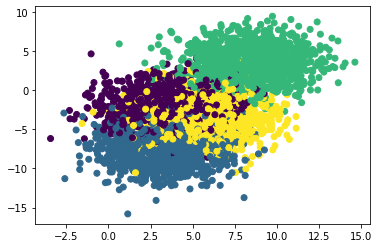

In [7]:
plt.scatter(x = data[0][:,0], y = data[0][:,1], c = data[1])

### Data in a DataFrame Representaion

In [8]:
df = pd.DataFrame(data = data[0], columns = [['feature1', 'feature2']])
df.head()

,feature1,feature2
0,5.109503,-3.154372
1,1.419998,-8.603702
2,2.120079,-6.043131
3,4.376125,-1.732747
4,1.498886,-7.483495


In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters = 4)

In [60]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [61]:
cent = kmeans.cluster_centers_
cent

array([[ 8.50077595,  3.6554068 ],
       [ 2.92688929, -1.91629973],
       [ 6.4040478 , -3.620504  ],
       [ 3.29049955, -7.73876852]])

In [62]:
kmeans.labels_

array([2, 3, 3, ..., 0, 3, 2])

In [63]:
kmeans.inertia_

28647.368256507893

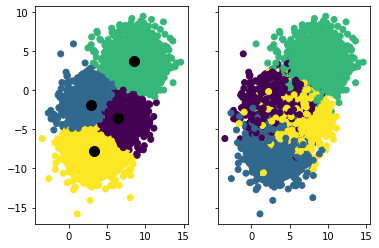

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols= 2, sharey= True)

ax1.scatter(x = data[0][:,0], y = data[0][:,1], c = kmeans.labels_)
ax1.scatter(x = cent[:,0], y = cent[:,1], s = 100, c = 'black')

ax2.scatter(x = data[0][:,0], y = data[0][:,1], c = data[1])

### Elbow Method

In [19]:
sum_sq = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters= k).fit(data[0])
    sum_sq[k] = kmeans.inertia_

In [20]:
sum_sq

{1: 139357.49492668547,
 2: 58344.19659177593,
 3: 36983.12343030982,
 4: 28647.004606701834,
 5: 24488.55127350354,
 6: 21489.230125627648,
 7: 18826.883017932036,
 8: 16798.720957752266,
 9: 15050.420648399182}

Text(0.5, 1.0, 'Elbow Method')

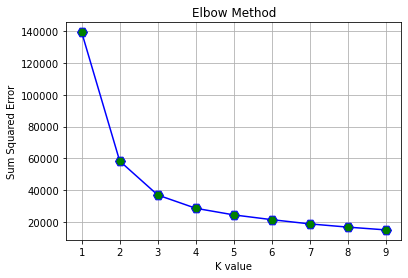

In [27]:
plt.plot(list(sum_sq.keys()), list(sum_sq.values()), 
         linestyle = '-', marker = 'H', color = 'b', markersize = 10, markerfacecolor = 'green')

plt.xlabel('K value')
plt.ylabel('Sum Squared Error')
plt.grid()
plt.title('Elbow Method')

### t-SNE Method (t-distributed Stochastic Neighbor Embedding)

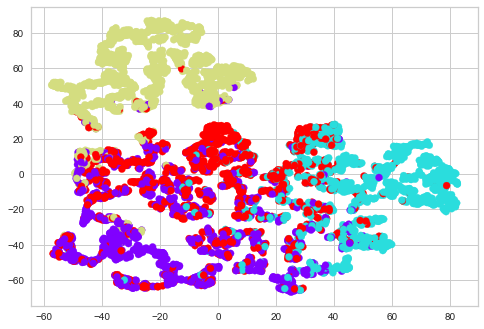

In [101]:
#TSNE: shows nearness of smaples to help judge on numbers of clusters with the Elbow method

from sklearn.manifold import TSNE

model = TSNE(learning_rate= 200)

tsne_features = model.fit_transform(data[0])

feature1 = tsne_features[:,0]
feature2 = tsne_features[:,1]

variety_numbers = [data[1]] #corresponds to the previously defined labels data[1]


# Visualization,coloring by variety_numbers
plt.scatter(feature1,feature2, c= variety_numbers, cmap= 'rainbow')
plt.show()

### Validating the clustering model using Silhouette  technique

In [102]:
kmeans.fit_predict(data[0])

# Calculate Silhoutte Score
score = silhouette_score(data[0], kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.409


### Silhouette Visualizer

In [69]:
from yellowbrick.cluster import SilhouetteVisualizer

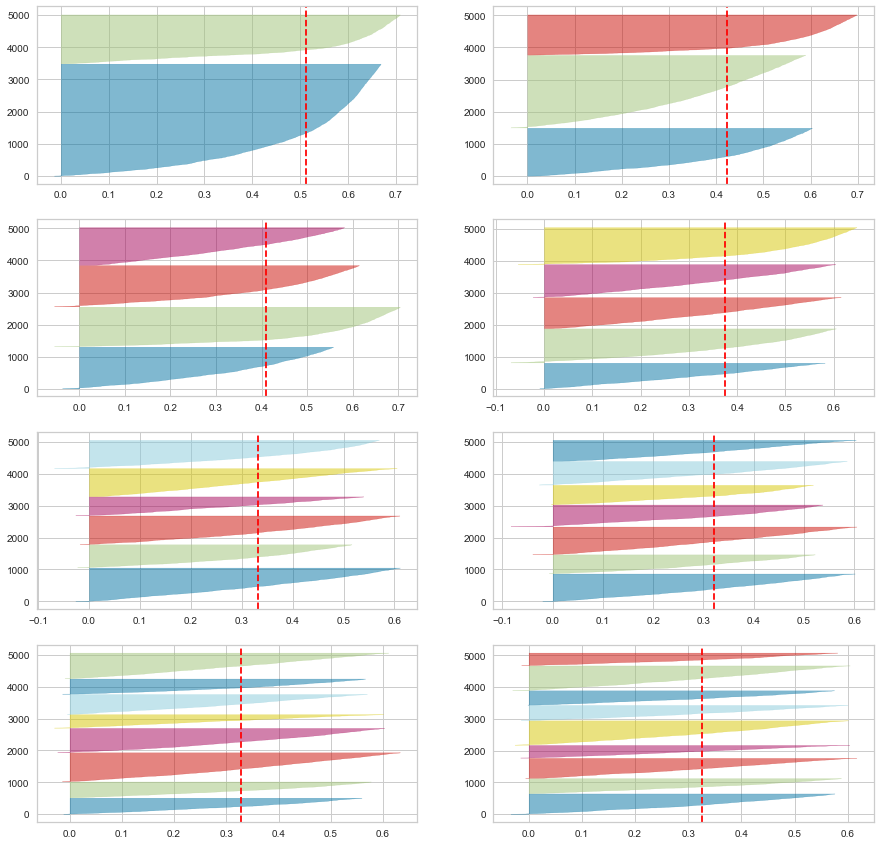

In [108]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))
for i in [2,3,4,5,6,7,8,9]:

    km = KMeans(n_clusters=i, init='k-means++')
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data[0])